<a href="https://colab.research.google.com/github/vedasam-ch15/Google-Play-Store-Data-Analysis/blob/main/Topic_Modeling_apps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
#data manipulation
import numpy as np
import pandas as pd
import seaborn as sns
import tqdm
#file and system operations
import os
import sys
assert sys.version_info >= (3,5)
#visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#consistent sized plots
from pylab import rcParams
rcParams['figure.figsize']=12,5
rcParams['axes.labelsize']=12
rcParams['ytick.labelsize']=12
rcParams['xtick.labelsize']=12
#handle unwanted warnings 
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)
#view all the columns
pd.options.display.max_columns = None
#basic text manipulation libraries
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# **FULL CATEGORY (BUSINESS APPS)**

In [80]:
full_data = pd.read_csv('/content/drive/MyDrive/design credits project/outputfile (1).csv')
full_data.head()

,appname,review-no,content,thumbsUpCount,score
0,ajio,1,This app showing 404 product not found error c...,0,1
1,ajio,2,Good 👍r response reasonable price,0,5
2,ajio,3,Very Good application to purchase appeal and f...,0,5
3,ajio,4,"I am trying to register, the app is asking for...",0,1
4,ajio,5,Isse ghatiya app maine na dekha h.. na hi dekh...,0,1


In [81]:
'''for (appname), group in full_data.groupby(['appname']):
     group.to_csv(f'{appname}.csv', index=False)
 
data = pd.read_csv('ajio.csv')
data.head()'''




"for (appname), group in full_data.groupby(['appname']):\n     group.to_csv(f'{appname}.csv', index=False)\n \ndata = pd.read_csv('ajio.csv')\ndata.head()"

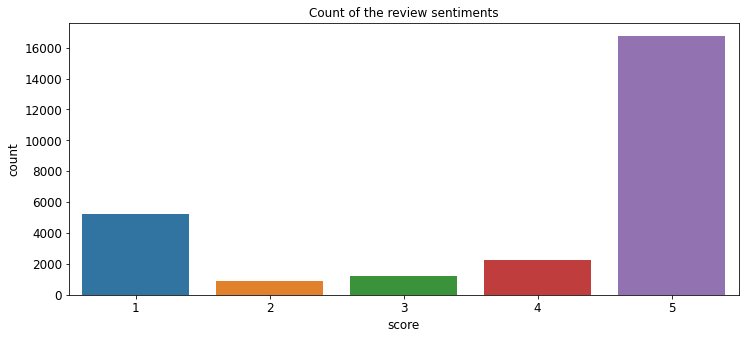

In [82]:
sns.countplot(full_data['score'])
plt.title('Count of the review sentiments')
plt.show()

In [83]:

import gensim

stemmer = SnowballStemmer('english')

def lemmatize_stemming(text):
 
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='n'))

def preprocess(text):
    
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result


In [84]:
processed_docs = []

for doc in full_data['content']:
    processed_docs.append(preprocess(doc))

In [85]:

dictionary = gensim.corpora.Dictionary(processed_docs)

In [86]:
dictionary.filter_extremes(no_below=5,no_above=0.1,keep_n=None)

In [87]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [88]:

seed = 41
lda_model = gensim.models.LdaMulticore(corpus=bow_corpus,num_topics=6,id2word=dictionary,passes=10,workers=2,
                                      random_state=seed,minimum_probability=0.05)

In [89]:
for idx,topic in lda_model.print_topics(-1,num_words=8):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.058*"work" + 0.029*"video" + 0.028*"download" + 0.027*"super" + 0.026*"time" + 0.019*"issu" + 0.019*"cours" + 0.019*"play"


Topic: 1 
Words: 0.211*"nice" + 0.125*"best" + 0.079*"busi" + 0.045*"applic" + 0.042*"use" + 0.034*"app" + 0.031*"help" + 0.027*"thank"


Topic: 2 
Words: 0.031*"like" + 0.030*"love" + 0.022*"updat" + 0.019*"option" + 0.015*"featur" + 0.015*"invoic" + 0.013*"need" + 0.012*"version"


Topic: 3 
Words: 0.116*"great" + 0.040*"servic" + 0.040*"product" + 0.022*"price" + 0.021*"store" + 0.018*"applic" + 0.016*"avail" + 0.016*"qualiti"


Topic: 4 
Words: 0.080*"easi" + 0.044*"game" + 0.035*"experi" + 0.032*"busi" + 0.030*"amaz" + 0.029*"user" + 0.027*"friend" + 0.018*"need"


Topic: 5 
Words: 0.035*"excel" + 0.033*"money" + 0.030*"lead" + 0.026*"custom" + 0.019*"servic" + 0.019*"awesom" + 0.018*"worst" + 0.017*"sulekha"






*   Topic 1: Not working properly, issues with updates and login
*   Topic 2: Positive reviews (best platform, great app, thanks for the app...)
*   Topic 3: Like the app but issue with updates for better versions 
* Topic 4: Price related issues
* Topic 5: Recommending the app but need improvement
* Topic 6: Time waste because of the fakeness of the app




# **FUNCTION DEFINITIONS**

loading the data of a particular app

In [90]:
def load_app_csv(app):
  for (appname), group in full_data.groupby(['appname']):
     group.to_csv(f'{appname}.csv', index=False)
 
  data = pd.read_csv(f'{app}.csv')
  return data


plotting the graph of a particular app

In [91]:

def graph(appname, data):
  sns.countplot(data['score'])
  plt.title(f'Count of the review sentiments for {appname} app')
  plt.show()

Preprocessing of apps

In [92]:
def preprocess(data):
  import gensim

  stemmer = SnowballStemmer('english')

  def lemmatize_stemming(text):
  
      return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='n'))

  def preprocess(text):
      
      result = []
      for token in gensim.utils.simple_preprocess(text):
          if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
              result.append(lemmatize_stemming(token))
      return result

  processed_docs = []

  for doc in data['content']:
      processed_docs.append(preprocess(doc))
      
  return processed_docs



model training

In [93]:
def lda(appname):
  data = load_app_csv(appname)
  pre = preprocess(data)
  dictionary = gensim.corpora.Dictionary(pre)
  dictionary.filter_extremes(no_below=5,no_above=0.1,keep_n=None)
  bow_corpus = [dictionary.doc2bow(doc) for doc in pre]

  seed = 41
  lda_model = gensim.models.LdaMulticore(corpus=bow_corpus,num_topics=6,id2word=dictionary,passes=10,workers=2,
                                      random_state=seed,minimum_probability=0.05)
  
  for idx,topic in lda_model.print_topics(-1,num_words=8):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")


# **APP WISE TOPIC MODELING**

In [94]:
appsnamelist = ['whatsapp','phonepe','shoekonnect','paytm','googlepay','drbindra','facebook','mailchimp','norbsoft','amazonpay','indianoil','udemy','digitaldukan','sulekha','segb','earnmoneyonline','indianmart','rcmbusiness','ghoshak','vyapar','anar','shopify','frshbooks','paypay','linkedin','monopoly','skype','jdbusiness','ajio','amazonbusiness']

# **1)WHATSAPP**

# GRAPH

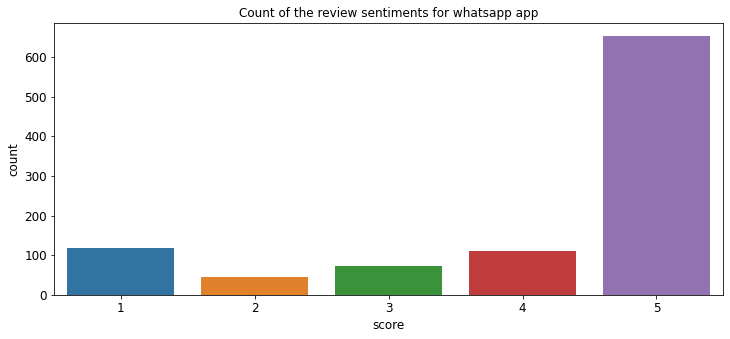

In [95]:
data = load_app_csv(appsnamelist[0])
graph(appsnamelist[0], data)

In [96]:
lda(appsnamelist[0])

Topic: 0 
Words: 0.400*"love" + 0.145*"like" + 0.056*"app" + 0.048*"status" + 0.048*"happi" + 0.048*"mast" + 0.042*"instal" + 0.039*"slow"


Topic: 1 
Words: 0.127*"easi" + 0.127*"updat" + 0.103*"problem" + 0.102*"thank" + 0.093*"enjoy" + 0.065*"fast" + 0.063*"use" + 0.050*"need"


Topic: 2 
Words: 0.263*"best" + 0.169*"super" + 0.143*"excel" + 0.077*"better" + 0.071*"time" + 0.041*"whatsapp" + 0.040*"ban" + 0.036*"number"


Topic: 3 
Words: 0.279*"whatsapp" + 0.233*"busi" + 0.044*"experi" + 0.044*"option" + 0.033*"tri" + 0.030*"download" + 0.030*"time" + 0.028*"want"


Topic: 4 
Words: 0.632*"nice" + 0.092*"awesom" + 0.064*"work" + 0.057*"applic" + 0.036*"interest" + 0.028*"help" + 0.022*"exlent" + 0.010*"fast"


Topic: 5 
Words: 0.294*"great" + 0.118*"amaz" + 0.093*"chat" + 0.085*"open" + 0.068*"kumar" + 0.066*"cool" + 0.045*"download" + 0.043*"start"




# TOPICS

* Topic 1: Love the app but installing slowly (technical)
* Topic 2: Easy to use but update problem (technical)
* Topic 3: Best app (good reviews) (non technical)
* Topic 4: Time taking for download (technical, Topic 1)
* Topic 5: Help related issues (non technical)
* Topic 6: Great app but problem opening a chat (technical)

# **2)PHONEPE**

# GRAPH

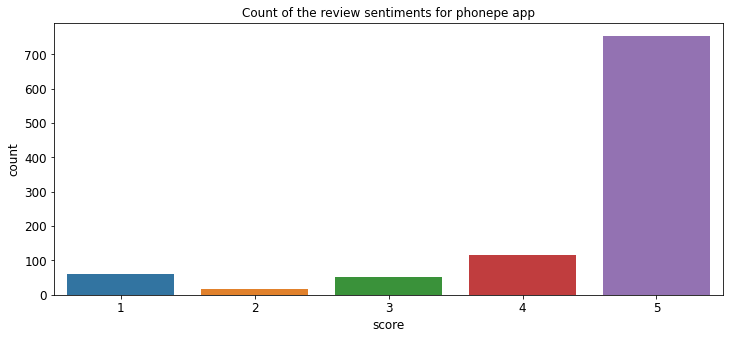

In [97]:
data = load_app_csv(appsnamelist[1])
graph(appsnamelist[1], data)

In [98]:
lda(appsnamelist[1])

Topic: 0 
Words: 0.619*"super" + 0.096*"easi" + 0.069*"fine" + 0.069*"ravi" + 0.056*"great" + 0.016*"problem" + 0.016*"option" + 0.008*"like"


Topic: 1 
Words: 0.353*"best" + 0.214*"busi" + 0.070*"account" + 0.067*"phonep" + 0.060*"mast" + 0.050*"bank" + 0.050*"experi" + 0.040*"thank"


Topic: 2 
Words: 0.272*"better" + 0.247*"use" + 0.247*"help" + 0.125*"busi" + 0.005*"super" + 0.005*"excel" + 0.004*"like" + 0.004*"phone"


Topic: 3 
Words: 0.356*"servic" + 0.139*"custom" + 0.125*"payment" + 0.089*"receiv" + 0.089*"applic" + 0.051*"problem" + 0.039*"person" + 0.027*"easi"


Topic: 4 
Words: 0.322*"phone" + 0.241*"awesom" + 0.221*"time" + 0.049*"payment" + 0.025*"option" + 0.025*"great" + 0.024*"thank" + 0.010*"servic"


Topic: 5 
Words: 0.495*"excel" + 0.284*"work" + 0.130*"like" + 0.018*"problem" + 0.006*"servic" + 0.004*"thank" + 0.003*"better" + 0.003*"applic"




# TOPICS

* Topic 1: Positive reviews (non technical)
* Topic 2: Positive reviews (non technical)
* Topic 3: Good app but help related issues (non tehchnical)
* Topic 4: Problem in recieving payment (technical)
* Topic 5: Positive reviews (non technical)
* Topic 6: Problem with the service (non technical)

# **3)SHOEKONNECT**

# GRAPH

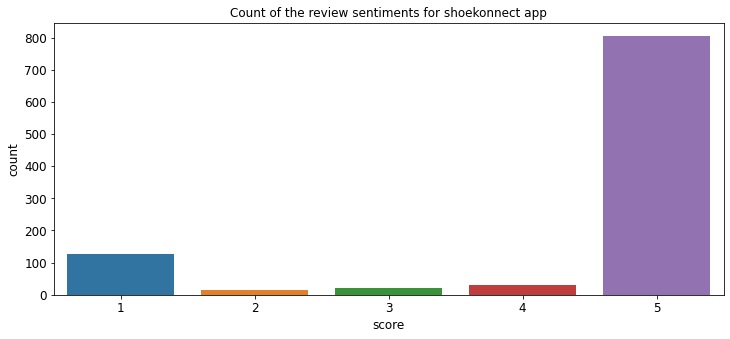

In [99]:
data = load_app_csv(appsnamelist[2])
graph(appsnamelist[2], data)  

In [100]:
lda(appsnamelist[2])

Topic: 0 
Words: 0.063*"bulk" + 0.054*"wholesal" + 0.036*"high" + 0.028*"amaz" + 0.026*"rate" + 0.024*"onlin" + 0.024*"easi" + 0.023*"recommend"


Topic: 1 
Words: 0.045*"excel" + 0.032*"time" + 0.031*"buyer" + 0.027*"bijni" + 0.023*"servic" + 0.023*"purchas" + 0.022*"thing" + 0.021*"app"


Topic: 2 
Words: 0.092*"nice" + 0.060*"order" + 0.040*"qualiti" + 0.029*"love" + 0.028*"experi" + 0.028*"worst" + 0.027*"custom" + 0.023*"money"


Topic: 3 
Words: 0.059*"servic" + 0.028*"simpl" + 0.028*"fantast" + 0.025*"great" + 0.022*"excel" + 0.020*"purchas" + 0.020*"custom" + 0.019*"like"


Topic: 4 
Words: 0.040*"wholesal" + 0.027*"extrem" + 0.026*"purchas" + 0.026*"help" + 0.022*"excel" + 0.018*"buyer" + 0.017*"softwar" + 0.017*"item"


Topic: 5 
Words: 0.053*"busi" + 0.034*"retail" + 0.029*"factori" + 0.026*"return" + 0.025*"order" + 0.023*"item" + 0.022*"wholesal" + 0.021*"thank"




# TOPICS

* Topic 1: Positive reviews, recommended to buy (non technical)
* Topic 2: Positive reviews, regarding service (non technical)
* Topic 3: Quality related issues (non technical)
* Topic 4: Positive reviews, regarding service and purchase (non technical)
* Topic 5: Help software related issues (technical)
* Topic 6: Price related issues (non technical)

# **4)PAYTM**

# GRAPH

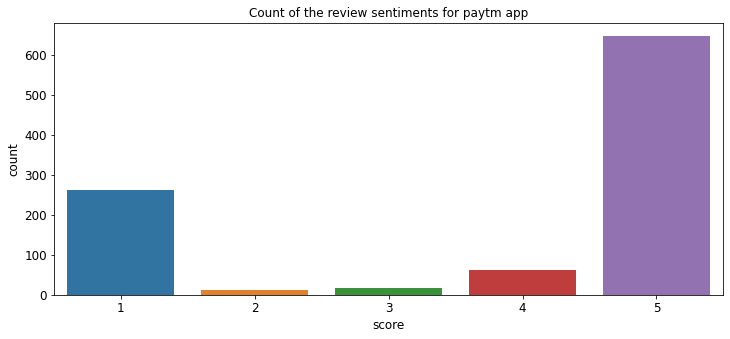

In [101]:
data = load_app_csv(appsnamelist[3])
graph(appsnamelist[3], data)

In [102]:
lda(appsnamelist[3])

Topic: 0 
Words: 0.103*"work" + 0.064*"time" + 0.048*"paytm" + 0.045*"respons" + 0.038*"show" + 0.037*"sound" + 0.036*"transact" + 0.030*"proper"


Topic: 1 
Words: 0.074*"loan" + 0.070*"paytm" + 0.063*"busi" + 0.052*"happi" + 0.049*"notif" + 0.049*"like" + 0.046*"nahi" + 0.037*"great"


Topic: 2 
Words: 0.194*"best" + 0.103*"busi" + 0.088*"money" + 0.071*"account" + 0.053*"experi" + 0.045*"easi" + 0.040*"paytm" + 0.035*"payment"


Topic: 3 
Words: 0.110*"custom" + 0.102*"paytm" + 0.050*"problem" + 0.047*"excel" + 0.041*"care" + 0.039*"servic" + 0.035*"support" + 0.032*"worst"


Topic: 4 
Words: 0.244*"servic" + 0.106*"super" + 0.073*"paytm" + 0.060*"applic" + 0.055*"help" + 0.052*"compani" + 0.045*"poor" + 0.029*"settlement"


Topic: 5 
Words: 0.099*"payment" + 0.091*"charg" + 0.077*"awesom" + 0.066*"month" + 0.060*"receiv" + 0.058*"settlement" + 0.041*"account" + 0.039*"use"




# TOPICS

* Topic 1: Taking time to work (technical)
* Topic 2: Notifications are not being recieved (technical)
* Topic 3: Easy to use (non technical)
* Topic 4: Support team related issues (non technical)
* Topic 5: Good service but help team related issues (non technical, topic 4)
* Topic 6: Positive reviews (non technical)

# **5)GOOGLEPAY**

# GRAPH

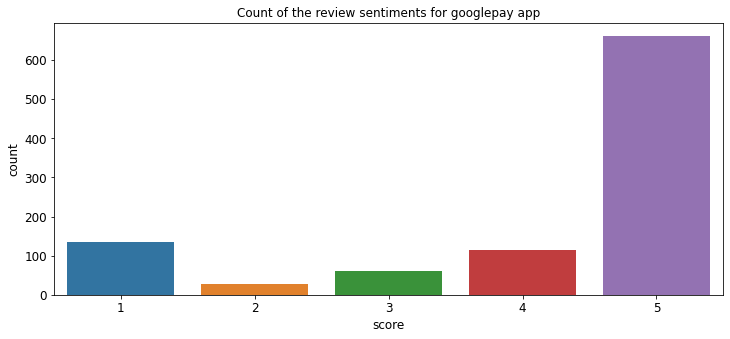

In [103]:
data = load_app_csv(appsnamelist[4])
graph(appsnamelist[4], data)

In [104]:
lda(appsnamelist[4])

Topic: 0 
Words: 0.100*"experi" + 0.098*"reward" + 0.091*"app" + 0.079*"account" + 0.050*"user" + 0.042*"option" + 0.042*"gpay" + 0.034*"awesom"


Topic: 1 
Words: 0.313*"super" + 0.161*"excel" + 0.108*"easi" + 0.071*"nahi" + 0.063*"provid" + 0.063*"help" + 0.051*"servic" + 0.037*"cashback"


Topic: 2 
Words: 0.315*"busi" + 0.237*"googl" + 0.068*"transact" + 0.061*"thank" + 0.054*"avail" + 0.053*"payment" + 0.042*"applic" + 0.039*"contact"


Topic: 3 
Words: 0.204*"servic" + 0.114*"custom" + 0.056*"gpay" + 0.054*"voic" + 0.045*"busi" + 0.044*"care" + 0.041*"account" + 0.040*"notif"


Topic: 4 
Words: 0.223*"best" + 0.120*"notif" + 0.103*"payment" + 0.068*"applic" + 0.061*"updat" + 0.054*"use" + 0.048*"like" + 0.041*"problem"


Topic: 5 
Words: 0.115*"time" + 0.100*"worst" + 0.099*"payment" + 0.098*"money" + 0.074*"receiv" + 0.056*"work" + 0.054*"issu" + 0.052*"settl"




# TOPICS

* Topic 1: Good reviews especially regarding rewards (non technical)
* Topic 2: Good reviews but cashback is not being recieved (technical)
* Topic 3: Positive reviews (non technical)
* Topic 4: Notification related issues (technical)
* Topic 5: Payment update related issues (technical)
* Topic 6: App not working properly, taking time (technical)

# **6)DRBINDRA**

# GRAPH

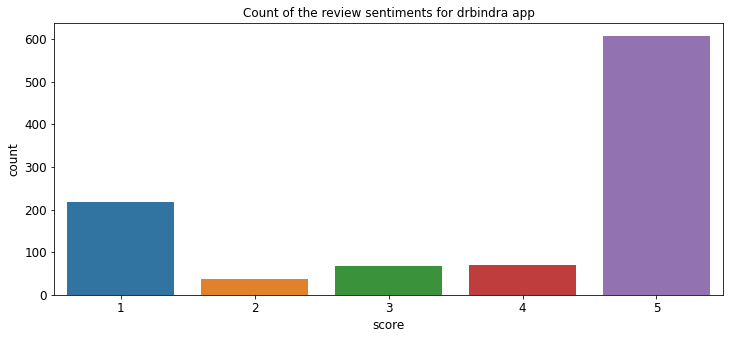

In [105]:
data = load_app_csv(appsnamelist[5])
graph(appsnamelist[5], data)

In [106]:
lda(appsnamelist[5])

Topic: 0 
Words: 0.094*"super" + 0.084*"thank" + 0.069*"slow" + 0.047*"knowledg" + 0.045*"high" + 0.043*"data" + 0.036*"want" + 0.031*"cours"


Topic: 1 
Words: 0.142*"great" + 0.093*"work" + 0.049*"bahut" + 0.045*"best" + 0.040*"content" + 0.037*"nahi" + 0.037*"use" + 0.033*"proper"


Topic: 2 
Words: 0.112*"nice" + 0.097*"best" + 0.086*"video" + 0.048*"improv" + 0.038*"help" + 0.029*"experi" + 0.028*"content" + 0.027*"life"


Topic: 3 
Words: 0.084*"excel" + 0.073*"post" + 0.061*"problem" + 0.056*"cours" + 0.049*"worst" + 0.041*"amaz" + 0.040*"user" + 0.036*"interfac"


Topic: 4 
Words: 0.071*"option" + 0.042*"login" + 0.041*"updat" + 0.033*"open" + 0.032*"download" + 0.029*"mobil" + 0.026*"bada" + 0.025*"motiv"


Topic: 5 
Words: 0.089*"vivek" + 0.088*"bindra" + 0.064*"learn" + 0.052*"applic" + 0.045*"time" + 0.035*"bada" + 0.031*"communiti" + 0.030*"app"




# TOPICS

* Topic 1: High data is being consumed (technical)
* Topic 2: Nice content (non technical)
* Topic 3: Video quality should be imporved (technical)
* Topic 4: Interface related issues (technical)
* Topic 5: Login and update issues (technical)
* Topic 6: Taking time (technical)

# **7)FACEBOOK**

# GRAPH

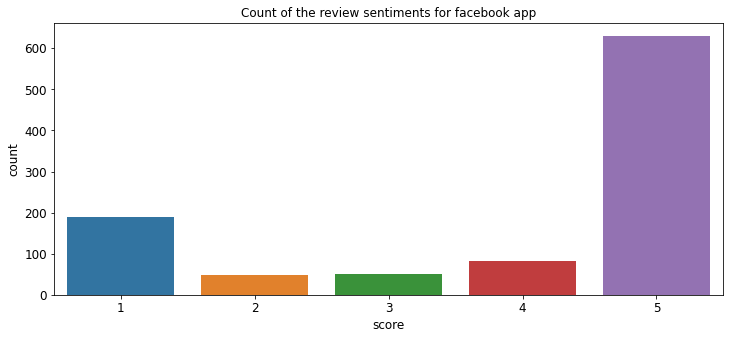

In [107]:
data = load_app_csv(appsnamelist[6])
graph(appsnamelist[6], data)

In [108]:
lda(appsnamelist[6])

Topic: 0 
Words: 0.162*"messag" + 0.053*"excel" + 0.044*"updat" + 0.039*"custom" + 0.038*"need" + 0.034*"bug" + 0.033*"repli" + 0.028*"comment"


Topic: 1 
Words: 0.174*"best" + 0.126*"app" + 0.073*"easi" + 0.068*"help" + 0.052*"comment" + 0.038*"post" + 0.027*"like" + 0.027*"know"


Topic: 2 
Words: 0.109*"messag" + 0.065*"notif" + 0.042*"updat" + 0.037*"get" + 0.031*"star" + 0.029*"busi" + 0.027*"time" + 0.027*"receiv"


Topic: 3 
Words: 0.118*"love" + 0.106*"page" + 0.084*"facebook" + 0.051*"super" + 0.045*"manag" + 0.038*"easi" + 0.035*"account" + 0.033*"busi"


Topic: 4 
Words: 0.157*"busi" + 0.086*"great" + 0.084*"page" + 0.074*"suit" + 0.049*"thank" + 0.043*"meta" + 0.027*"friend" + 0.026*"help"


Topic: 5 
Words: 0.136*"work" + 0.113*"post" + 0.043*"awesom" + 0.043*"like" + 0.033*"problem" + 0.030*"open" + 0.028*"featur" + 0.027*"updat"




# TOPICS

* Topic 1: Reply or comment(bug) issues (technical)
* Topic 2: Help issues(non technical)
* Topic 3: Message notification being recieved late (technical)
* Topic 4: Positive reviews (non technical)
* Topic 5: Positive reviews regarding updated version meta (non tehcnical)
* Topic 6: Issues regarding opening of updated features (technical)

# **8)MAILCHIMP**

# GRAPH

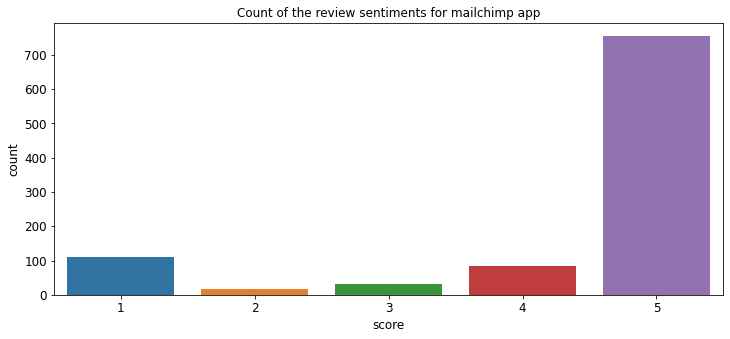

In [109]:
data = load_app_csv(appsnamelist[7])
graph(appsnamelist[7], data)

In [110]:
lda(appsnamelist[7])

Topic: 0 
Words: 0.145*"good" + 0.044*"work" + 0.042*"function" + 0.029*"easier" + 0.028*"communic" + 0.027*"simpl" + 0.025*"intuit" + 0.022*"experi"


Topic: 1 
Words: 0.078*"busi" + 0.048*"help" + 0.046*"thank" + 0.032*"need" + 0.028*"perfect" + 0.021*"time" + 0.020*"free" + 0.020*"account"


Topic: 2 
Words: 0.100*"market" + 0.063*"tool" + 0.060*"best" + 0.044*"excel" + 0.044*"help" + 0.033*"open" + 0.033*"platform" + 0.026*"resend"


Topic: 3 
Words: 0.068*"work" + 0.065*"mobil" + 0.048*"nice" + 0.045*"amaz" + 0.040*"edit" + 0.038*"user" + 0.035*"friend" + 0.030*"like"


Topic: 4 
Words: 0.084*"campaign" + 0.039*"time" + 0.037*"servic" + 0.034*"make" + 0.031*"year" + 0.031*"manag" + 0.021*"save" + 0.020*"send"


Topic: 5 
Words: 0.096*"awesom" + 0.059*"mail" + 0.054*"experi" + 0.040*"creat" + 0.038*"send" + 0.031*"custom" + 0.026*"thank" + 0.023*"chimp"




# TOPICS

* Topic 1: Positive reviews regarding experience of the app (non technical)
* Topic 2: Positive reviews, also requests for help (non technical)
* Topic 3: Positive reviews (non technical, topic 2)
* Topic 4: Problems using the mobile app (tehcnical)
* Topic 5: Time being taken (technical)
* Topic 6: Positive reviews (non technical)

# **9)NORBSOFT**

# GRAPH

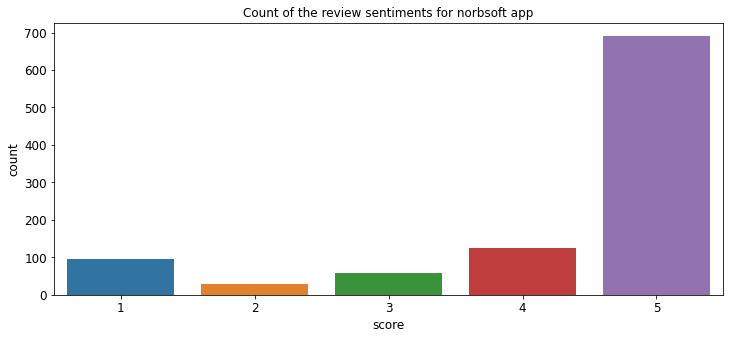

In [111]:
data = load_app_csv(appsnamelist[8])
graph(appsnamelist[8], data)

In [112]:
lda(appsnamelist[8])

Topic: 0 
Words: 0.186*"work" + 0.185*"excel" + 0.101*"great" + 0.070*"time" + 0.046*"error" + 0.039*"connect" + 0.036*"proper" + 0.029*"instal"


Topic: 1 
Words: 0.164*"easi" + 0.152*"love" + 0.119*"product" + 0.106*"slow" + 0.091*"oriflam" + 0.048*"busi" + 0.041*"wonder" + 0.038*"amaz"


Topic: 2 
Words: 0.189*"busi" + 0.085*"use" + 0.071*"oriflam" + 0.060*"superb" + 0.045*"team" + 0.043*"beauti" + 0.038*"like" + 0.034*"thank"


Topic: 3 
Words: 0.250*"help" + 0.236*"super" + 0.094*"friend" + 0.082*"updat" + 0.057*"user" + 0.037*"applic" + 0.034*"version" + 0.027*"downlin"


Topic: 4 
Words: 0.322*"nice" + 0.236*"best" + 0.116*"amaz" + 0.079*"awesom" + 0.053*"download" + 0.051*"open" + 0.029*"inform" + 0.020*"opportun"


Topic: 5 
Words: 0.110*"oriflam" + 0.092*"experi" + 0.065*"month" + 0.060*"join" + 0.055*"peopl" + 0.044*"level" + 0.044*"brand" + 0.042*"network"




# TOPICS

* Topic 1: Error connecting properly or installing(technical)
* Topic 2: Slow app (technical)
* Topic 3: Positive reviews (non technical)
* Topic 4: New versions not being updated (technical)
* Topic 5: Download issues (technical)
* Topic 6: Positive reviews regarding the people's network (non technical)

# **10)AMAZONPAY**

# GRAPH

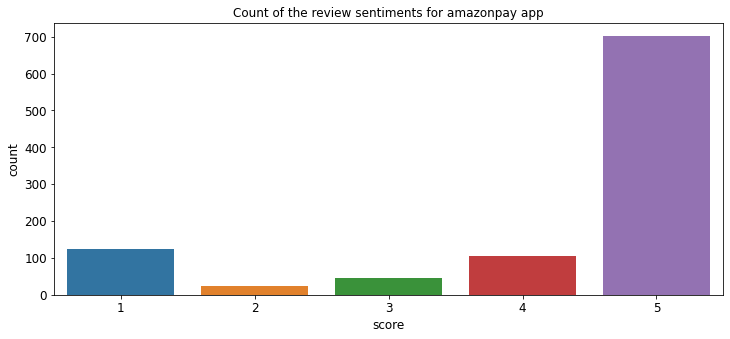

In [113]:
data = load_app_csv(appsnamelist[9])
graph(appsnamelist[9], data)

In [114]:
lda(appsnamelist[9])

Topic: 0 
Words: 0.149*"excel" + 0.137*"busi" + 0.110*"cashback" + 0.098*"code" + 0.089*"custom" + 0.060*"account" + 0.051*"reward" + 0.051*"time"


Topic: 1 
Words: 0.378*"amazon" + 0.092*"like" + 0.082*"use" + 0.081*"voic" + 0.076*"work" + 0.072*"notif" + 0.068*"applic" + 0.054*"busi"


Topic: 2 
Words: 0.442*"super" + 0.250*"work" + 0.139*"thank" + 0.100*"open" + 0.011*"updat" + 0.004*"amazon" + 0.002*"merchant" + 0.002*"shop"


Topic: 3 
Words: 0.313*"servic" + 0.125*"superb" + 0.108*"great" + 0.108*"better" + 0.091*"love" + 0.080*"experi" + 0.058*"money" + 0.020*"reward"


Topic: 4 
Words: 0.254*"payment" + 0.131*"option" + 0.100*"staff" + 0.084*"bahut" + 0.082*"merchant" + 0.082*"help" + 0.035*"notif" + 0.035*"like"


Topic: 5 
Words: 0.441*"best" + 0.188*"amaz" + 0.147*"app" + 0.085*"mast" + 0.033*"applic" + 0.032*"shop" + 0.010*"experi" + 0.005*"merchant"




# TOPICS

* Topic 1: Good reviews especially regarding rewards (non technical)
* Topic 2: Voice inputs are not taken properly (technical)
* Topic 3: Good reviews, regarding updates (non technical)
* Topic 4: Good reviews especially regarding rewards (non technical, topic 1)
* Topic 5: Notification and help related issues (technical and non technical)
* Topic 6: Good reviews (non technical)


# **11)INDIANOIL**

# GRAPH

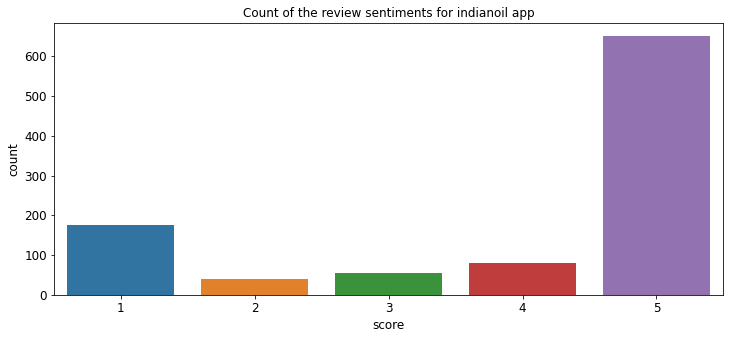

In [115]:
data = load_app_csv(appsnamelist[10])
graph(appsnamelist[10], data)

In [116]:
lda(appsnamelist[10])

Topic: 0 
Words: 0.497*"super" + 0.134*"problem" + 0.112*"plus" + 0.091*"icon" + 0.078*"download" + 0.012*"book" + 0.004*"nice" + 0.004*"work"


Topic: 1 
Words: 0.375*"work" + 0.203*"best" + 0.103*"app" + 0.064*"applic" + 0.060*"easi" + 0.055*"time" + 0.036*"perform" + 0.036*"great"


Topic: 2 
Words: 0.725*"nice" + 0.069*"open" + 0.064*"proper" + 0.042*"avail" + 0.022*"indian" + 0.017*"work" + 0.006*"updat" + 0.005*"phone"


Topic: 3 
Words: 0.219*"worst" + 0.137*"option" + 0.126*"book" + 0.110*"issu" + 0.097*"year" + 0.083*"better" + 0.069*"experi" + 0.033*"deliveri"


Topic: 4 
Words: 0.210*"excel" + 0.183*"deliveri" + 0.129*"mobil" + 0.117*"servic" + 0.071*"busi" + 0.068*"indian" + 0.048*"hang" + 0.037*"applic"


Topic: 5 
Words: 0.220*"updat" + 0.146*"slow" + 0.089*"phone" + 0.057*"help" + 0.057*"hang" + 0.050*"upgrad" + 0.046*"error" + 0.042*"time"




# TOPICS

* Topic 1: Super app but Download related issues (technical)
* Topic 2: Good app but time delayed (technical)
* Topic 3: Nice app but update issues (technical)
* Topic 4: Booking related issues (technical)
* Topic 5: App being hanged (technical)
* Topic 6: Update done slowly and also app getting hanged (technical)

# **12)UDEMY**

# GRAPH

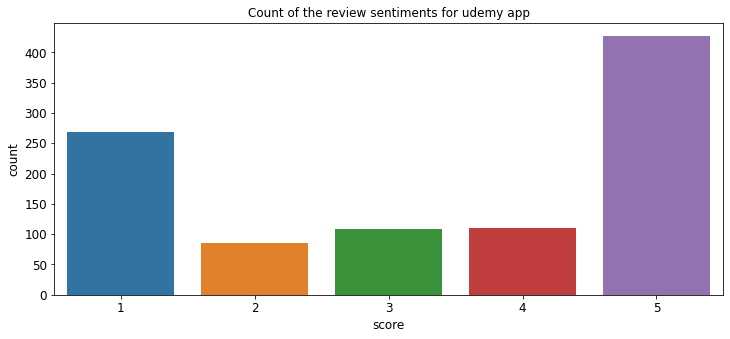

In [117]:
data = load_app_csv(appsnamelist[11])
graph(appsnamelist[11], data)

In [118]:
lda(appsnamelist[11])

Topic: 0 
Words: 0.047*"experi" + 0.035*"version" + 0.028*"skill" + 0.028*"kind" + 0.027*"screenshot" + 0.026*"team" + 0.024*"option" + 0.023*"need"


Topic: 1 
Words: 0.070*"best" + 0.056*"use" + 0.053*"user" + 0.050*"help" + 0.048*"platform" + 0.047*"abl" + 0.034*"mobil" + 0.031*"friend"


Topic: 2 
Words: 0.051*"cast" + 0.048*"nice" + 0.047*"login" + 0.044*"time" + 0.032*"awesom" + 0.023*"stream" + 0.022*"lectur" + 0.021*"open"


Topic: 3 
Words: 0.085*"chromecast" + 0.070*"cast" + 0.042*"unabl" + 0.034*"download" + 0.028*"updat" + 0.027*"problem" + 0.024*"error" + 0.024*"time"


Topic: 4 
Words: 0.057*"content" + 0.055*"easi" + 0.046*"excel" + 0.038*"screen" + 0.037*"udemi" + 0.035*"love" + 0.028*"featur" + 0.025*"avail"


Topic: 5 
Words: 0.137*"download" + 0.038*"load" + 0.033*"offlin" + 0.033*"issu" + 0.029*"lectur" + 0.020*"updat" + 0.020*"internet" + 0.020*"tri"




# TOPICS

* Topic 1: Good app but screenshot option needed (technical suggestion)
* Topic 2: Help related issues (non technical)
* Topic 3: Login and loading issues (technical)
* Topic 4: Download and update probelm (technical)
* Topic 5: Good reviews (non technical)
* Topic 6: Download and loading issues (technical, topic 4, topic 3)

# **13)DIGITALDUKAN**

# GRAPH

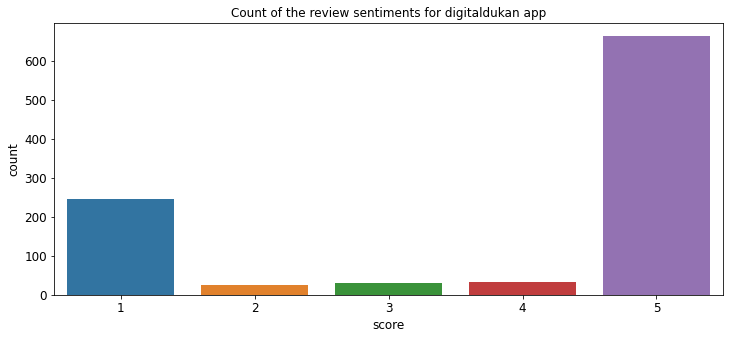

In [119]:
data = load_app_csv(appsnamelist[12])
graph(appsnamelist[12], data)

In [120]:
lda(appsnamelist[12])

Topic: 0 
Words: 0.102*"busi" + 0.066*"use" + 0.048*"great" + 0.044*"onlin" + 0.029*"like" + 0.026*"websit" + 0.025*"small" + 0.025*"platform"


Topic: 1 
Words: 0.051*"order" + 0.043*"categori" + 0.040*"need" + 0.038*"work" + 0.036*"excel" + 0.034*"time" + 0.031*"page" + 0.025*"deliveri"


Topic: 2 
Words: 0.102*"applic" + 0.082*"digit" + 0.081*"showroom" + 0.041*"featur" + 0.038*"option" + 0.020*"start" + 0.019*"product" + 0.018*"download"


Topic: 3 
Words: 0.076*"onlin" + 0.050*"store" + 0.049*"best" + 0.037*"digit" + 0.037*"applic" + 0.029*"showroom" + 0.026*"super" + 0.021*"account"


Topic: 4 
Words: 0.046*"money" + 0.039*"servic" + 0.038*"custom" + 0.026*"payment" + 0.023*"premium" + 0.022*"experi" + 0.020*"product" + 0.020*"time"


Topic: 5 
Words: 0.162*"nice" + 0.103*"domain" + 0.032*"want" + 0.028*"purchas" + 0.028*"fake" + 0.018*"review" + 0.017*"fraud" + 0.017*"link"




# TOPICS

* Topic 1: Good reviews (non technical)
* Topic 2: Time loading pages (technical)
* Topic 3: Downloading some feature issues (technical)
* Topic 4: Good reviews (non technical)
* Topic 5: Premium feature issues (technical or non technical)
* Topic 6: Fraud and fake issues (non technical)


# **14)SULEKHA**

# GRAPH

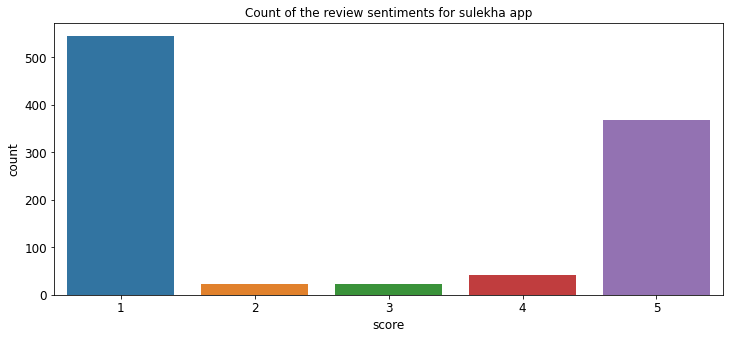

In [121]:
data = load_app_csv(appsnamelist[13])
graph(appsnamelist[13], data)

In [122]:
lda(appsnamelist[13])

Topic: 0 
Words: 0.147*"nice" + 0.079*"best" + 0.044*"provid" + 0.041*"paisa" + 0.039*"help" + 0.037*"genuin" + 0.035*"recommend" + 0.035*"time"


Topic: 1 
Words: 0.038*"month" + 0.038*"fraud" + 0.038*"compani" + 0.033*"custom" + 0.032*"call" + 0.024*"singl" + 0.024*"refund" + 0.019*"given"


Topic: 2 
Words: 0.071*"time" + 0.060*"invest" + 0.049*"work" + 0.045*"worst" + 0.038*"come" + 0.031*"use" + 0.027*"applic" + 0.027*"person"


Topic: 3 
Words: 0.100*"worst" + 0.039*"respons" + 0.027*"proper" + 0.026*"custom" + 0.020*"excel" + 0.020*"client" + 0.019*"get" + 0.018*"respond"


Topic: 4 
Words: 0.073*"custom" + 0.064*"experi" + 0.039*"get" + 0.028*"hain" + 0.027*"thank" + 0.024*"care" + 0.019*"genuin" + 0.019*"issu"


Topic: 5 
Words: 0.076*"poor" + 0.068*"compani" + 0.048*"refund" + 0.039*"total" + 0.038*"time" + 0.028*"custom" + 0.027*"useless" + 0.026*"invest"




# TOPICS

* Topic 1: Good reviews but help issues (non technical)
* Topic 2: Refund and fraud issues (non technical)
* Topic 3: Time related issues (technical)
* Topic 4: No response to the client (non technical)
* Topic 5: some issue (content not clear)
* Topic 6: Useless investment (non technical)

# **15)SGB**

# GRAPH

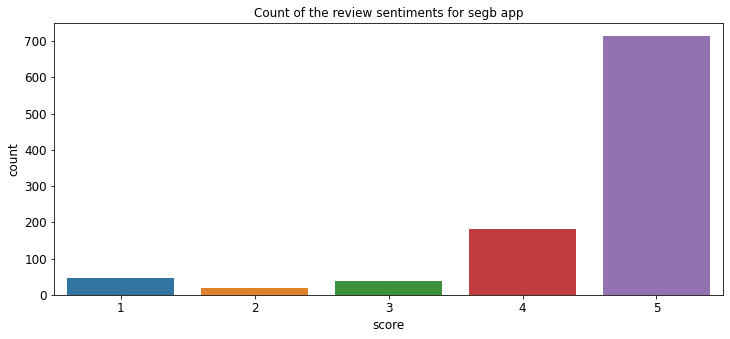

In [123]:
data = load_app_csv(appsnamelist[14])
graph(appsnamelist[14], data)

In [124]:
lda(appsnamelist[14])

Topic: 0 
Words: 0.156*"best" + 0.111*"love" + 0.091*"small" + 0.042*"manag" + 0.028*"recommend" + 0.026*"want" + 0.026*"thank" + 0.024*"think"


Topic: 1 
Words: 0.148*"nice" + 0.065*"help" + 0.058*"thank" + 0.058*"app" + 0.045*"applic" + 0.030*"small" + 0.026*"product" + 0.024*"need"


Topic: 2 
Words: 0.073*"sale" + 0.059*"report" + 0.038*"inventori" + 0.033*"need" + 0.032*"excel" + 0.029*"thank" + 0.027*"thing" + 0.024*"option"


Topic: 3 
Words: 0.095*"work" + 0.052*"devic" + 0.047*"need" + 0.042*"simpl" + 0.038*"featur" + 0.037*"better" + 0.035*"user" + 0.034*"wish"


Topic: 4 
Words: 0.080*"perfect" + 0.048*"time" + 0.045*"purchas" + 0.033*"product" + 0.031*"look" + 0.031*"learn" + 0.030*"like" + 0.027*"item"


Topic: 5 
Words: 0.103*"like" + 0.093*"easi" + 0.052*"awesom" + 0.046*"option" + 0.039*"use" + 0.038*"featur" + 0.037*"inventori" + 0.035*"love"




# TOPICS

mostly positive reviews

# **16)EARNMONEYONLINE**

# GRAPH

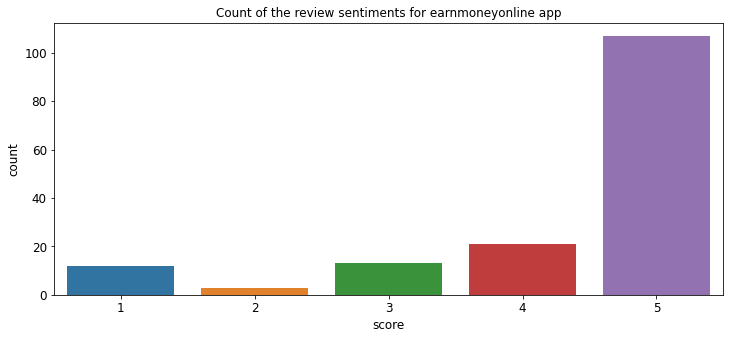

In [125]:
data = load_app_csv(appsnamelist[15])
graph(appsnamelist[15], data)

In [126]:
lda(appsnamelist[15])

Topic: 0 
Words: 0.440*"help" + 0.330*"inform" + 0.142*"idea" + 0.019*"best" + 0.008*"great" + 0.008*"like" + 0.008*"onlin" + 0.008*"busi"


Topic: 1 
Words: 0.313*"work" + 0.225*"busi" + 0.221*"onlin" + 0.167*"opportun" + 0.012*"idea" + 0.010*"like" + 0.008*"inform" + 0.008*"experi"


Topic: 2 
Words: 0.809*"great" + 0.083*"opportun" + 0.014*"onlin" + 0.010*"easi" + 0.010*"best" + 0.010*"idea" + 0.009*"inform" + 0.009*"busi"


Topic: 3 
Words: 0.522*"easi" + 0.327*"like" + 0.026*"help" + 0.025*"great" + 0.014*"experi" + 0.011*"best" + 0.011*"work" + 0.011*"busi"


Topic: 4 
Words: 0.496*"best" + 0.368*"experi" + 0.014*"onlin" + 0.013*"idea" + 0.013*"inform" + 0.013*"busi" + 0.012*"easi" + 0.012*"opportun"


Topic: 5 
Words: 0.416*"idea" + 0.367*"excel" + 0.081*"help" + 0.060*"best" + 0.009*"great" + 0.009*"work" + 0.009*"busi" + 0.009*"like"




# TOPICS

* Topic 1: Good idea (non technical)
* Topic 2: Good reviews (non technical)
* Topic 3: Good reviews (non technical)
* Topic 4: Good reviews mostly, but requesting help (non technical)
* Topic 5: Good reviews (non technical)
* Topic 6: Good reviews with help related issues (non technical)

# **17)INDIANMART**

# GRAPH

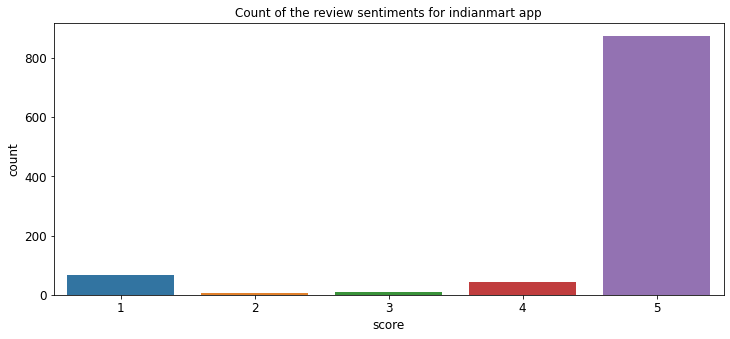

In [127]:
data = load_app_csv(appsnamelist[16])
graph(appsnamelist[16], data)

In [128]:
lda(appsnamelist[16])

Topic: 0 
Words: 0.216*"excel" + 0.151*"great" + 0.140*"help" + 0.108*"experi" + 0.064*"love" + 0.049*"awesom" + 0.045*"easi" + 0.043*"seller"


Topic: 1 
Words: 0.264*"servic" + 0.166*"india" + 0.130*"mart" + 0.072*"applic" + 0.058*"superb" + 0.053*"requir" + 0.042*"compani" + 0.032*"inform"


Topic: 2 
Words: 0.311*"super" + 0.246*"platform" + 0.100*"busi" + 0.074*"useful" + 0.063*"sell" + 0.053*"market" + 0.025*"price" + 0.013*"like"


Topic: 3 
Words: 0.227*"busi" + 0.158*"use" + 0.139*"indiamart" + 0.070*"thank" + 0.053*"lead" + 0.039*"happi" + 0.034*"money" + 0.032*"fake"


Topic: 4 
Words: 0.375*"best" + 0.140*"product" + 0.071*"price" + 0.044*"amaz" + 0.034*"app" + 0.032*"need" + 0.029*"supplier" + 0.027*"reason"


Topic: 5 
Words: 0.085*"buyer" + 0.071*"number" + 0.065*"respons" + 0.061*"work" + 0.055*"custom" + 0.050*"time" + 0.046*"provid" + 0.040*"indiamart"




# TOPICS

* Topic 1: Easy to use app (non technical)
* Topic 2: Good reviews regarding service (non technical)
* Topic 3: Useful app (non technical)
* Topic 4: Good reviews but few issues regarding fakeness (non technical)
* Topic 5: Price related issues (non technical)
* Topic 6: Takes time for response (technical)

# **18)RCMBUSINESS**

# GRAPH

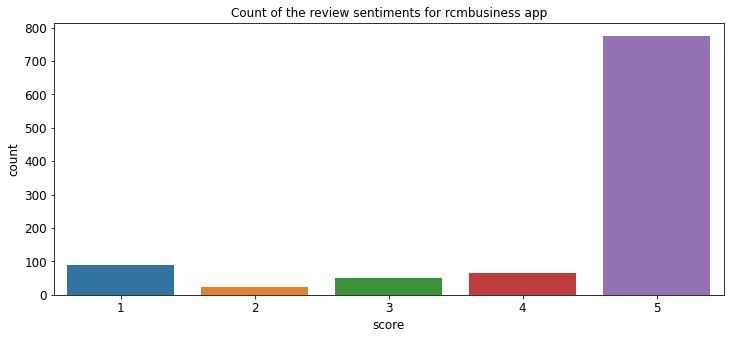

In [129]:
data = load_app_csv(appsnamelist[17])
graph(appsnamelist[17], data)

In [130]:
lda(appsnamelist[17])

Topic: 0 
Words: 0.415*"best" + 0.341*"product" + 0.086*"applic" + 0.034*"superb" + 0.027*"better" + 0.027*"qualiti" + 0.027*"like" + 0.003*"know"


Topic: 1 
Words: 0.274*"excel" + 0.201*"updat" + 0.077*"servic" + 0.058*"onlin" + 0.058*"wonder" + 0.049*"worst" + 0.048*"time" + 0.048*"money"


Topic: 2 
Words: 0.249*"app" + 0.152*"slow" + 0.115*"easi" + 0.098*"love" + 0.098*"amaz" + 0.075*"beauti" + 0.057*"poor" + 0.024*"busi"


Topic: 3 
Words: 0.399*"busi" + 0.159*"great" + 0.128*"work" + 0.077*"life" + 0.069*"year" + 0.047*"time" + 0.018*"beauti" + 0.017*"option"


Topic: 4 
Words: 0.141*"help" + 0.135*"market" + 0.115*"use" + 0.078*"network" + 0.074*"thank" + 0.067*"improv" + 0.066*"experi" + 0.065*"bussi"


Topic: 5 
Words: 0.423*"super" + 0.236*"compani" + 0.064*"india" + 0.049*"qualiti" + 0.038*"need" + 0.034*"poor" + 0.025*"market" + 0.021*"improv"




# TOPICS

* Topic 1: Good reviews regarding quality (non technical)
* Topic 2: Update related issues (technical)
* Topic 3: Time delay (technical)
* Topic 4: Good reviews (non technical)
* Topic 5: Help related issues (non technical)
* Topic 6: Quality improvement needed (non technical)

# **19)GHOSHAK**

# GRAPH

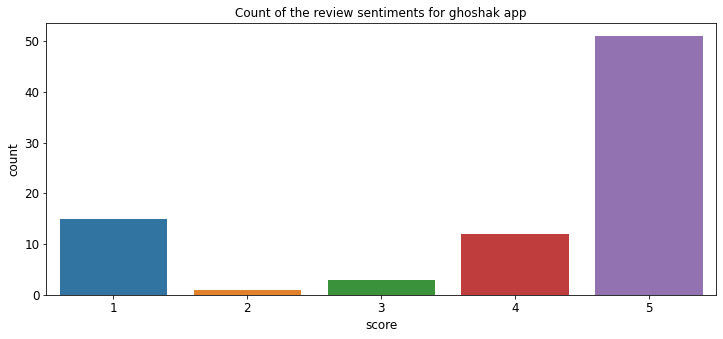

In [131]:
data = load_app_csv(appsnamelist[18])
graph(appsnamelist[18], data)

In [132]:
lda(appsnamelist[18])

Topic: 0 
Words: 0.248*"nice" + 0.238*"sale" + 0.206*"useful" + 0.110*"product" + 0.104*"offer" + 0.007*"download" + 0.007*"money" + 0.007*"help"


Topic: 1 
Words: 0.270*"servic" + 0.269*"money" + 0.203*"wast" + 0.170*"download" + 0.007*"useful" + 0.007*"sale" + 0.006*"offer" + 0.006*"easi"


Topic: 2 
Words: 0.219*"small" + 0.215*"owner" + 0.184*"help" + 0.149*"thank" + 0.077*"best" + 0.077*"support" + 0.006*"product" + 0.006*"offer"


Topic: 3 
Words: 0.283*"use" + 0.174*"nice" + 0.173*"offer" + 0.118*"best" + 0.064*"small" + 0.064*"servic" + 0.014*"owner" + 0.010*"easi"


Topic: 4 
Words: 0.253*"manag" + 0.253*"stock" + 0.183*"offer" + 0.079*"product" + 0.068*"sale" + 0.057*"easi" + 0.009*"wast" + 0.008*"download"


Topic: 5 
Words: 0.313*"easi" + 0.246*"support" + 0.108*"best" + 0.074*"thank" + 0.074*"product" + 0.040*"servic" + 0.040*"sale" + 0.040*"manag"




# TOPICS

* Topic 1: Good reviews with offer related issues (non technical)
* Topic 2: Waste of money (non technical)
* Topic 3: Help and support issues (non technical)
* Topic 4: Good reviews (non technical)
* Topic 5: Download issues (technical)
* Topic 6: Good reviews regarding service and support (non technical)

# **20)VYAPAR**

# GRAPH

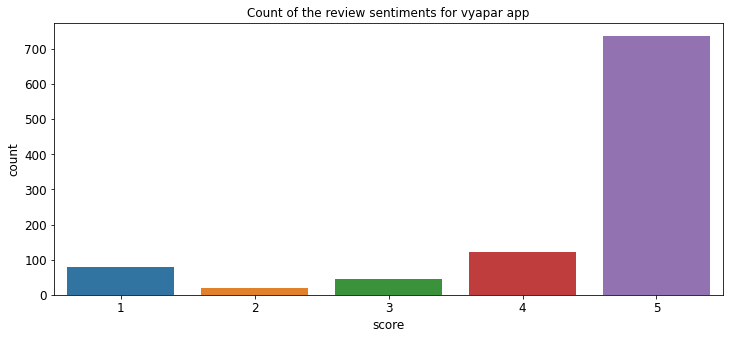

In [133]:
data = load_app_csv(appsnamelist[19])
graph(appsnamelist[19], data)

In [134]:
lda(appsnamelist[19])

Topic: 0 
Words: 0.162*"nice" + 0.075*"work" + 0.060*"vyapar" + 0.058*"help" + 0.050*"awesom" + 0.036*"thank" + 0.032*"team" + 0.025*"data"


Topic: 1 
Words: 0.071*"applic" + 0.033*"version" + 0.029*"mobil" + 0.026*"desktop" + 0.023*"account" + 0.023*"updat" + 0.022*"parti" + 0.021*"balanc"


Topic: 2 
Words: 0.078*"excel" + 0.077*"busi" + 0.075*"user" + 0.054*"option" + 0.053*"friend" + 0.045*"super" + 0.032*"featur" + 0.029*"small"


Topic: 3 
Words: 0.145*"easi" + 0.073*"bill" + 0.059*"softwar" + 0.057*"use" + 0.051*"great" + 0.044*"nice" + 0.038*"love" + 0.036*"account"


Topic: 4 
Words: 0.050*"item" + 0.045*"custom" + 0.044*"updat" + 0.042*"option" + 0.032*"invoic" + 0.028*"sale" + 0.027*"need" + 0.023*"print"


Topic: 5 
Words: 0.154*"best" + 0.053*"support" + 0.026*"busi" + 0.026*"time" + 0.024*"invoic" + 0.024*"price" + 0.022*"like" + 0.021*"phone"




# TOPICS

* Topic 1: Good reviews regarding help team (non technical)
* Topic 2: Mobile version update issues (technical)
* Topic 3: Good reviews (non technical)
* Topic 4: good software (non technical)
* Topic 5: Invoice update issues (technical)
* Topic 6: Invoice and price issues (technical)

# **21)ANAR**

# GRAPH

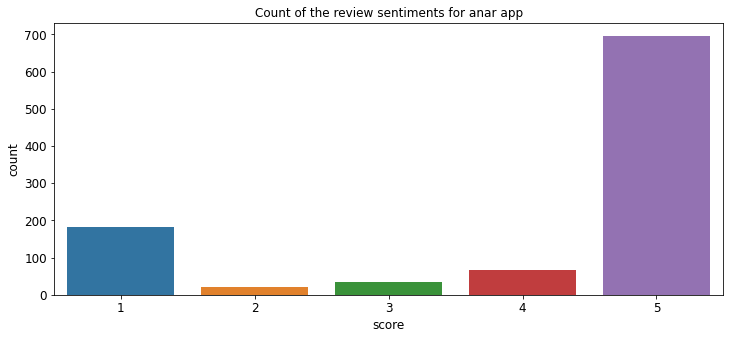

In [135]:
data = load_app_csv(appsnamelist[20])
graph(appsnamelist[20], data)

In [136]:
lda(appsnamelist[20])

Topic: 0 
Words: 0.131*"time" + 0.069*"great" + 0.068*"slow" + 0.057*"work" + 0.051*"wast" + 0.034*"photo" + 0.031*"product" + 0.029*"download"


Topic: 1 
Words: 0.067*"product" + 0.049*"experi" + 0.049*"fake" + 0.046*"excel" + 0.044*"like" + 0.040*"platform" + 0.039*"categori" + 0.037*"fraud"


Topic: 2 
Words: 0.078*"worst" + 0.054*"awesom" + 0.047*"network" + 0.040*"featur" + 0.034*"help" + 0.033*"work" + 0.033*"peopl" + 0.029*"delet"


Topic: 3 
Words: 0.288*"applic" + 0.142*"anar" + 0.034*"great" + 0.032*"recommend" + 0.030*"amaz" + 0.025*"servic" + 0.021*"happi" + 0.020*"like"


Topic: 4 
Words: 0.082*"use" + 0.077*"grow" + 0.054*"easi" + 0.053*"custom" + 0.050*"thank" + 0.048*"amaz" + 0.048*"connect" + 0.039*"super"


Topic: 5 
Words: 0.065*"option" + 0.044*"wholesal" + 0.042*"help" + 0.037*"app" + 0.036*"easi" + 0.033*"need" + 0.033*"requir" + 0.030*"price"




# TOPICS

* Topic 1: Slowly running and download update issues (technical)
* Topic 2: Fake and fraud issues (non technical)
* Topic 3: Help feature related issues (technical)
* Topic 4: Good reviews (non technical)
* Topic 5: Good reviews (non technical)
* Topic 6: Price and help related issues (technical or non technical)


# **22)SHOPIFY**

# GRAPH

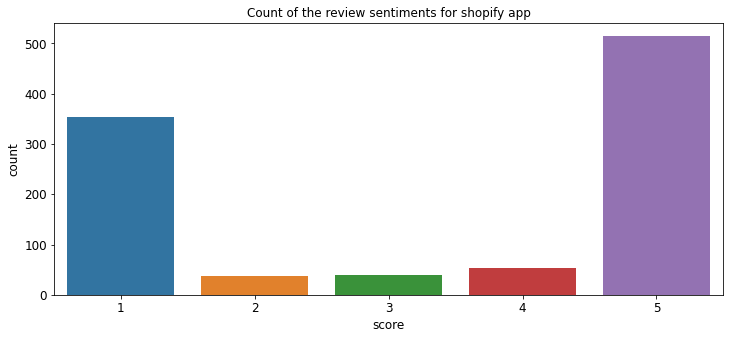

In [137]:
data = load_app_csv(appsnamelist[21])
graph(appsnamelist[21], data)

In [138]:
lda(appsnamelist[21])

Topic: 0 
Words: 0.063*"product" + 0.050*"fake" + 0.043*"updat" + 0.033*"worst" + 0.027*"account" + 0.021*"money" + 0.018*"item" + 0.017*"download"


Topic: 1 
Words: 0.064*"store" + 0.039*"fraud" + 0.038*"payment" + 0.035*"money" + 0.029*"site" + 0.027*"websit" + 0.024*"product" + 0.023*"peopl"


Topic: 2 
Words: 0.034*"store" + 0.031*"help" + 0.022*"money" + 0.022*"websit" + 0.022*"product" + 0.021*"month" + 0.021*"busi" + 0.017*"sell"


Topic: 3 
Words: 0.071*"work" + 0.056*"busi" + 0.055*"easi" + 0.042*"best" + 0.032*"start" + 0.029*"platform" + 0.028*"like" + 0.023*"excel"


Topic: 4 
Words: 0.143*"good" + 0.101*"love" + 0.050*"easi" + 0.031*"store" + 0.025*"track" + 0.024*"shop" + 0.022*"onlin" + 0.020*"contact"


Topic: 5 
Words: 0.057*"nice" + 0.044*"need" + 0.035*"time" + 0.029*"custom" + 0.022*"help" + 0.022*"wast" + 0.021*"chang" + 0.019*"issu"




# TOPICS

* Topic 1: Fake product and update issues(technical)
* Topic 2: Fraud issues (non technical)
* Topic 3: Money and help issues (non technical)
* Topic 4: Good reviews (non technical)
* Topic 5: Good reviews (non technical)
* Topic 6: Time delay and also help team issues (technical and non technical)

# **23)FRSHBOOKS**

# GRAPH

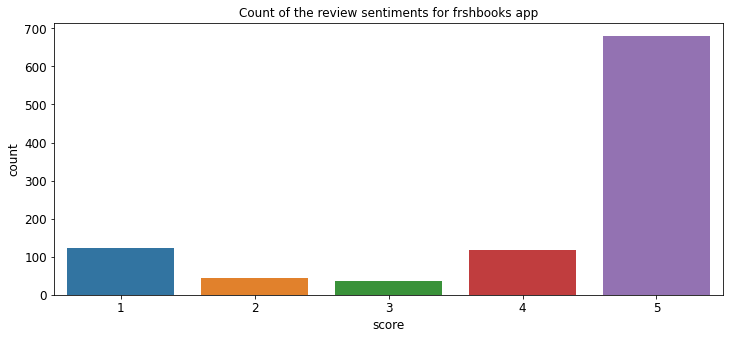

In [139]:
data = load_app_csv(appsnamelist[22])
graph(appsnamelist[22], data)

In [140]:
lda(appsnamelist[22])

Topic: 0 
Words: 0.074*"love" + 0.057*"friend" + 0.052*"user" + 0.042*"time" + 0.038*"track" + 0.029*"experi" + 0.028*"expens" + 0.026*"work"


Topic: 1 
Words: 0.077*"good" + 0.044*"nice" + 0.029*"custom" + 0.029*"perfect" + 0.022*"freshbook" + 0.021*"need" + 0.021*"work" + 0.021*"app"


Topic: 2 
Words: 0.082*"work" + 0.044*"need" + 0.037*"track" + 0.029*"keep" + 0.026*"free" + 0.026*"thing" + 0.026*"thank" + 0.024*"trial"


Topic: 3 
Words: 0.055*"account" + 0.039*"freshbook" + 0.030*"year" + 0.028*"custom" + 0.027*"servic" + 0.023*"time" + 0.021*"featur" + 0.020*"softwar"


Topic: 4 
Words: 0.064*"help" + 0.042*"like" + 0.037*"time" + 0.029*"issu" + 0.023*"freshbook" + 0.020*"support" + 0.020*"super" + 0.018*"load"


Topic: 5 
Words: 0.036*"book" + 0.035*"small" + 0.025*"fresh" + 0.025*"easier" + 0.024*"look" + 0.023*"make" + 0.022*"need" + 0.021*"option"




# TOPICS

Mostly positive reviews except for loading and time issues 

# **24)PAYPAY**

# GRAPH

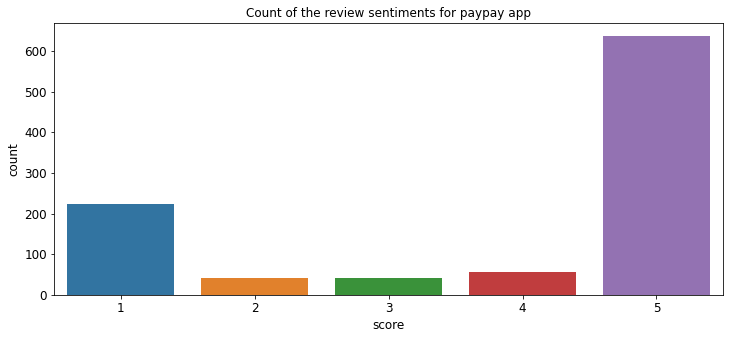

In [141]:
data = load_app_csv(appsnamelist[23])
graph(appsnamelist[23], data)

In [142]:
lda(appsnamelist[23])

Topic: 0 
Words: 0.086*"money" + 0.059*"like" + 0.047*"invoic" + 0.046*"custom" + 0.044*"send" + 0.044*"servic" + 0.043*"card" + 0.036*"payment"


Topic: 1 
Words: 0.221*"nice" + 0.114*"money" + 0.063*"app" + 0.056*"need" + 0.053*"help" + 0.026*"life" + 0.025*"day" + 0.024*"know"


Topic: 2 
Words: 0.130*"busi" + 0.122*"great" + 0.087*"account" + 0.048*"payment" + 0.024*"person" + 0.023*"receiv" + 0.023*"transact" + 0.023*"creat"


Topic: 3 
Words: 0.162*"love" + 0.095*"thank" + 0.071*"time" + 0.063*"easi" + 0.049*"cash" + 0.043*"friend" + 0.039*"hard" + 0.031*"number"


Topic: 4 
Words: 0.096*"account" + 0.060*"best" + 0.038*"open" + 0.037*"limit" + 0.035*"problem" + 0.032*"download" + 0.028*"reason" + 0.027*"time"


Topic: 5 
Words: 0.116*"work" + 0.060*"excel" + 0.040*"password" + 0.037*"experi" + 0.037*"worst" + 0.036*"issu" + 0.031*"load" + 0.028*"phone"




# TOPICS

* Topic 1: Good reviews (non technical)
* Topic 2: Mostly good reviews except for help team issues (non technical)
* Topic 3: Transaction or payment related issues (non technical)
* Topic 4: Positive reviews but Difficulty in cash transaction (non technical)
* Topic 5: Account opening problems and download issues (technical)
* Topic 6: Password and loading issues (technical)

# **25)LINKEDIN**

# GRAPH

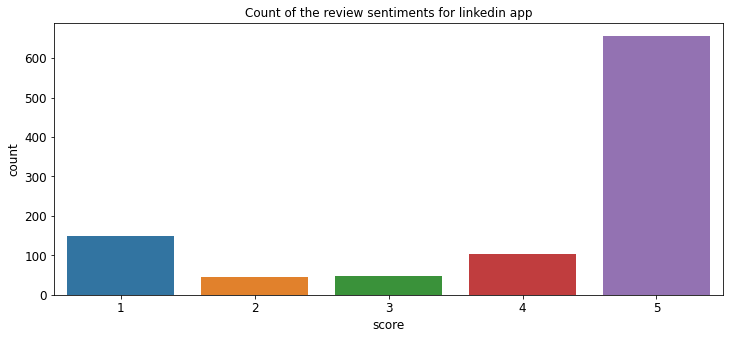

In [143]:
data = load_app_csv(appsnamelist[24])
graph(appsnamelist[24], data)

In [144]:
lda(appsnamelist[24])

Topic: 0 
Words: 0.162*"best" + 0.056*"search" + 0.049*"world" + 0.045*"opportun" + 0.039*"job" + 0.037*"platform" + 0.035*"need" + 0.029*"link"


Topic: 1 
Words: 0.111*"post" + 0.099*"love" + 0.084*"like" + 0.060*"linkedin" + 0.060*"platform" + 0.053*"open" + 0.050*"amaz" + 0.032*"connect"


Topic: 2 
Words: 0.093*"experi" + 0.090*"awesom" + 0.056*"applic" + 0.045*"inform" + 0.042*"super" + 0.037*"linkedin" + 0.035*"help" + 0.035*"profil"


Topic: 3 
Words: 0.159*"nice" + 0.081*"linkedin" + 0.063*"account" + 0.048*"connect" + 0.042*"time" + 0.028*"peopl" + 0.022*"restrict" + 0.021*"appli"


Topic: 4 
Words: 0.233*"great" + 0.156*"excel" + 0.065*"easi" + 0.045*"network" + 0.044*"use" + 0.038*"work" + 0.038*"fantast" + 0.038*"servic"


Topic: 5 
Words: 0.094*"work" + 0.053*"connect" + 0.051*"help" + 0.048*"year" + 0.041*"profession" + 0.035*"time" + 0.035*"phone" + 0.030*"linkedin"




# TOPICS

* Topic 1: Best platform for job search (non technical)
* Topic 2: Good reviews (non technical)
* Topic 3: Good reviews in terms of help (non technical)
* Topic 4: Issues related to some restriction (non technical)
* Topic 5: Good reviews in terms of network and service (non technical)
* Topic 6: Good reviews

# **26)MONOPOLY**

# GRAPH

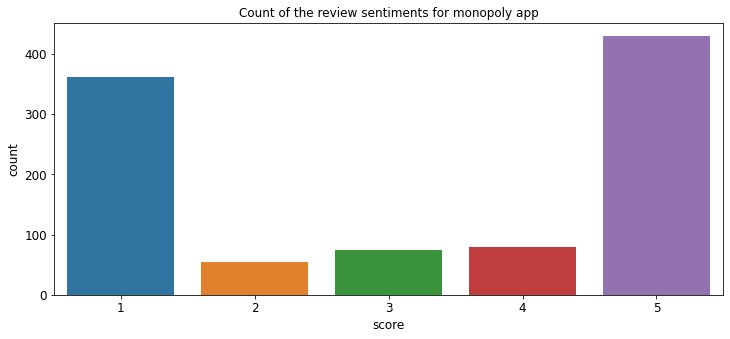

In [145]:
data = load_app_csv(appsnamelist[25])
graph(appsnamelist[25], data)

In [146]:
lda(appsnamelist[25])

Topic: 0 
Words: 0.096*"best" + 0.064*"player" + 0.052*"friend" + 0.043*"network" + 0.036*"problem" + 0.035*"onlin" + 0.034*"room" + 0.027*"busi"


Topic: 1 
Words: 0.244*"nice" + 0.054*"download" + 0.050*"awesom" + 0.047*"onlin" + 0.046*"star" + 0.030*"work" + 0.026*"time" + 0.024*"pas"


Topic: 2 
Words: 0.114*"like" + 0.075*"updat" + 0.044*"need" + 0.040*"chang" + 0.037*"suck" + 0.033*"dice" + 0.029*"monopoli" + 0.028*"player"


Topic: 3 
Words: 0.066*"time" + 0.042*"experi" + 0.040*"develop" + 0.031*"automat" + 0.029*"worst" + 0.027*"want" + 0.026*"jail" + 0.023*"give"


Topic: 4 
Words: 0.090*"worst" + 0.070*"love" + 0.056*"super" + 0.042*"amaz" + 0.035*"build" + 0.032*"option" + 0.028*"place" + 0.026*"player"


Topic: 5 
Words: 0.052*"crash" + 0.039*"time" + 0.036*"board" + 0.035*"monopoli" + 0.035*"famili" + 0.034*"version" + 0.033*"updat" + 0.027*"excel"




# TOPICS

* Topic 1: Network issues (technical)
* Topic 2: Good reviews (non technical)
* Topic 3: Update issues (technical)
* Topic 4: Development issues (technical)
* Topic 5: Bad app in terms of the game (non technical)
* Topic 6: Update and crashing issues (technical)

# **27)SKYPE**

# GRAPH

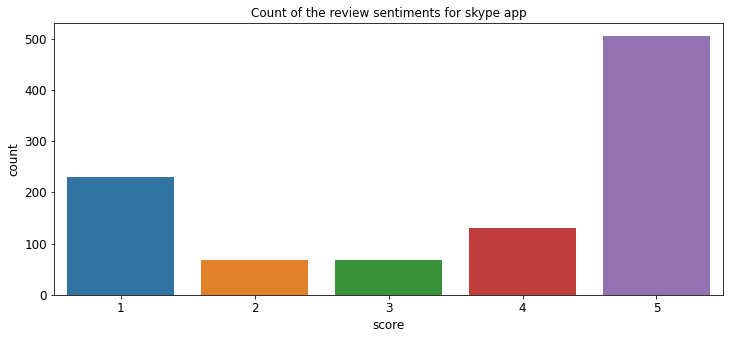

In [147]:
data = load_app_csv(appsnamelist[26])
graph(appsnamelist[26], data)

In [148]:
lda(appsnamelist[26])

Topic: 0 
Words: 0.156*"excel" + 0.054*"communic" + 0.048*"updat" + 0.046*"share" + 0.044*"problem" + 0.033*"perfect" + 0.032*"abl" + 0.030*"notif"


Topic: 1 
Words: 0.167*"great" + 0.113*"nice" + 0.065*"busi" + 0.057*"team" + 0.050*"chat" + 0.041*"thank" + 0.024*"experi" + 0.023*"skype"


Topic: 2 
Words: 0.083*"time" + 0.050*"call" + 0.045*"best" + 0.039*"convers" + 0.036*"mobil" + 0.034*"applic" + 0.034*"desktop" + 0.033*"login"


Topic: 3 
Words: 0.048*"qualiti" + 0.046*"user" + 0.043*"voic" + 0.042*"conveni" + 0.037*"friend" + 0.033*"call" + 0.031*"use" + 0.028*"love"


Topic: 4 
Words: 0.075*"skype" + 0.066*"connect" + 0.045*"easi" + 0.045*"busi" + 0.033*"android" + 0.033*"issu" + 0.030*"meet" + 0.027*"like"


Topic: 5 
Words: 0.069*"meet" + 0.057*"phone" + 0.054*"permiss" + 0.054*"need" + 0.042*"contact" + 0.041*"sign" + 0.034*"access" + 0.033*"want"




# TOPICS

* Topic 1: Update and notification issues (technical)
* Topic 2: Good reviews (non techncial)
* Topic 3: Login issues in app (technical)
* Topic 4: Good reviews (non technical)
* Topic 5: Connection issues (technical)
* Topic 6: Sign in and permission issues (non technical)

# **28)JDBUSINESS**

# GRAPH

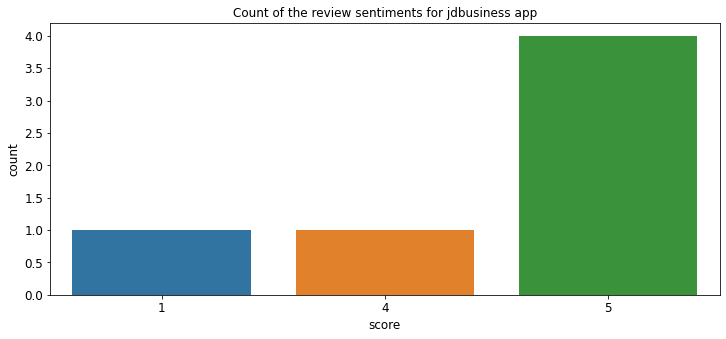

In [149]:
data = load_app_csv(appsnamelist[27])
graph(appsnamelist[27], data)

In [150]:
lda(appsnamelist[27])

ValueError: ignored

In [ ]:
for (appname), group in full_data.groupby(['appname']):
     group.to_csv(f'{appname}.csv', index=False)
 
data1 = pd.read_csv('jdbusiness.csv')
data1

Only 5 newest reviews, all of them being very vague and unclear, it is difficult to divide the reviews into topics

# **29)AJIO**

# GRAPH

In [ ]:
data = load_app_csv(appsnamelist[28])
graph(appsnamelist[28], data)

In [ ]:
lda(appsnamelist[28])

# TOPICS

* Topic 1: Delivery and return issues (non technical)
* Topic 2: Order and price issues (non technical)
* Topic 3: Registration issues (technical)
* Topic 4: Slow (technical)
* Topic 5: Quality issues (non technical)
* Topic 6: Login and update issues (technical)

# **30)AMAZONBUSINESS**

# GRAPH

In [ ]:
data = load_app_csv(appsnamelist[29])
graph(appsnamelist[29], data)

In [ ]:
lda(appsnamelist[29])

# TOPICS

* Topic 1: Best experience with app but opening issues (technical)
* Topic 2: Opening issues (Topic 1, technical)
* Topic 3: Topic 2 and topic 1
* Topic 4: Not woring properly (technical)
* Topic 5: Issues with custom status (technical)
* Topic 6: Custom status issues (technical)